In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from pandas import DataFrame, Series

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
%matplotlib inline

In [7]:
c_cycle=("#3498db","#e74c3c","#1abc9c","#9b59b6","#f1c40f","#ecf0f1","#34495e",
                  "#446cb3","#d24d57","#27ae60","#663399", "#f7ca18","#bdc3c7","#2c3e50")
mpl.rc('font', family='Bitstream Vera Sans', size=20)
mpl.rc('lines', linewidth=2,color="#2c3e50")
mpl.rc('patch', linewidth=0,facecolor="none",edgecolor="none")
mpl.rc('text', color='#2c3e50')
mpl.rc('axes', facecolor='none',edgecolor="none",titlesize=25,labelsize=15,color_cycle=c_cycle,grid=False)
mpl.rc('xtick.major',size=10,width=0)
mpl.rc('ytick.major',size=10,width=0)
mpl.rc('xtick.minor',size=10,width=0)
mpl.rc('ytick.minor',size=10,width=0)
mpl.rc('ytick',direction="out")
mpl.rc('grid',color='#c0392b',alpha=0.3,linewidth=1)
mpl.rc('legend',numpoints=3,fontsize=15,borderpad=0,markerscale=3,labelspacing=0.2,frameon=False,framealpha=0.6,handlelength=1,handleheight=0.5)
mpl.rc('figure',figsize=(10,6),dpi=80,facecolor="none",edgecolor="none")
mpl.rc('savefig',dpi=100,facecolor="none",edgecolor="none")

Changed design

###Plot the daily temperature over the course of the year. (This should probably be a line chart.) Create a bar chart that shows the average temperature and humidity by month.

In [8]:
weather = pd.read_table("daily_weather.tsv")


In [9]:
usage = pd.read_table("usage_2012.tsv")

In [63]:
station = pd.read_table("stations.tsv")

In [11]:
weather.loc[weather['season_code'] == 1, 'season_desc'] = 'winter'

In [12]:
weather.loc[weather['season_code'] == 2, 'season_desc'] = 'spring'

In [13]:
weather.loc[weather['season_code'] == 3, 'season_desc'] = 'summer'

In [14]:
weather.loc[weather['season_code'] == 4, 'season_desc'] = 'fall'

In [15]:
weather['date'] = pd.to_datetime(weather['date'])

In [16]:
month_rental = weather.groupby(weather['date'].dt.month)['total_riders'].sum()


In [17]:
mean = weather.groupby('season_desc')['temp'].mean()

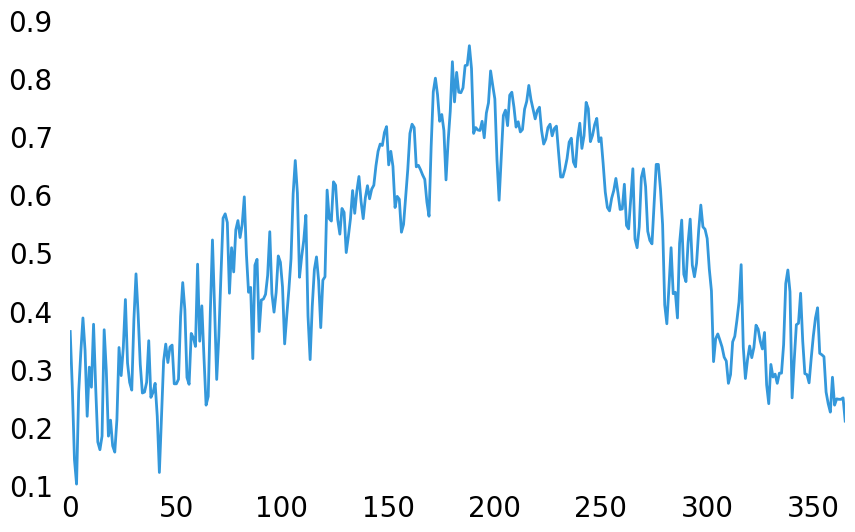

In [18]:
weather['temp'].plot()

In [19]:
weather['month'] = pd.DatetimeIndex(weather.date).month

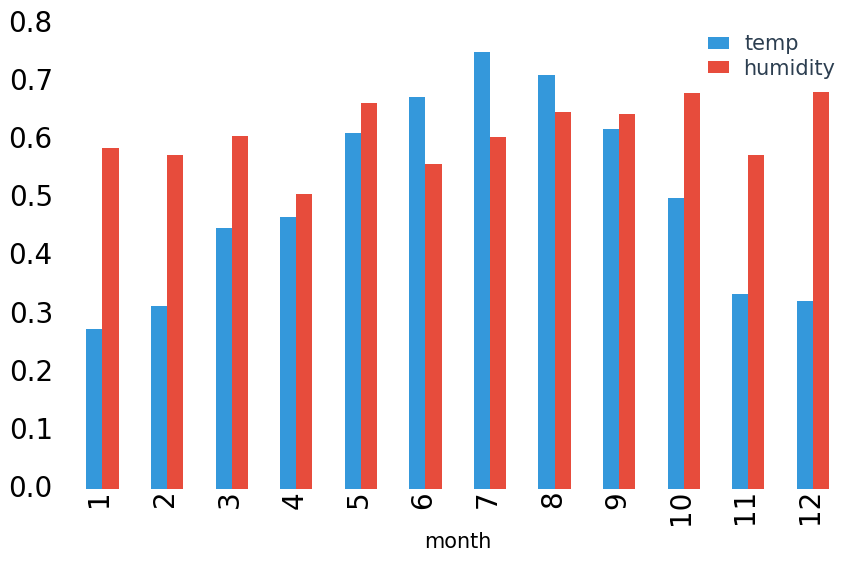

In [20]:
weather.groupby('month')['temp', 'humidity'].mean().plot(kind='bar')


###2.Use a scatterplot to show how the daily rental volume varies with temperature. Use a different series (with different colors) for each season.

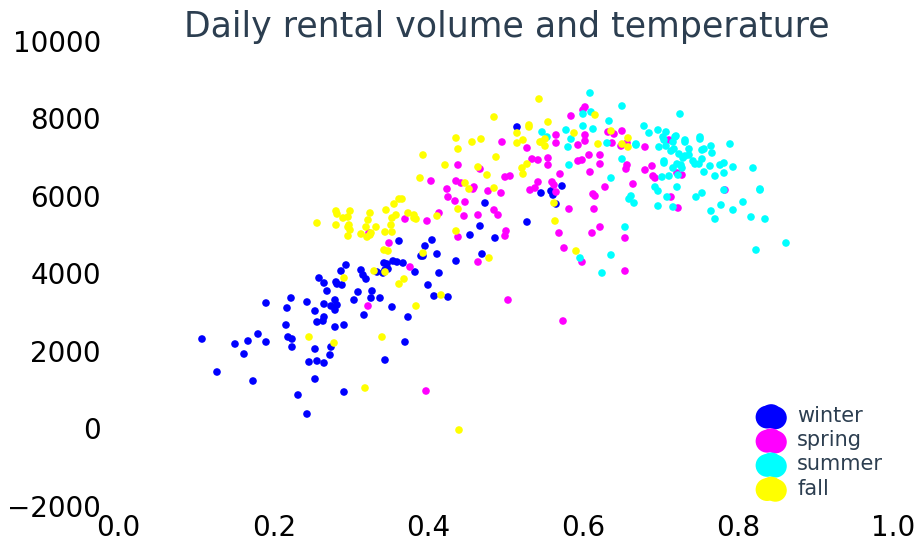

In [21]:
plt.scatter(
    weather[weather['season_desc'] == 'winter']['temp'],
    weather[weather['season_desc'] == 'winter']['total_riders'],
    s=30, color='blue', label='winter'
)
plt.scatter(
    weather[weather['season_desc'] == 'spring']['temp'],
    weather[weather['season_desc'] == 'spring']['total_riders'],
    s=30, color='magenta', label='spring'
)
plt.scatter(
    weather[weather['season_desc'] == 'summer']['temp'],
    weather[weather['season_desc'] == 'summer']['total_riders'],
    s=30, color='cyan', label='summer'
)
plt.scatter(
    weather[weather['season_desc'] == 'fall']['temp'],
    weather[weather['season_desc'] == 'fall']['total_riders'],
    s=30, color='yellow', label='fall'
)
plt.title("Daily rental volume and temperature")
plt.legend(loc=4)
plt.show()

###3.Create another scatterplot to show how daily rental volume varies with windspeed.  As above, use a different series for each season.

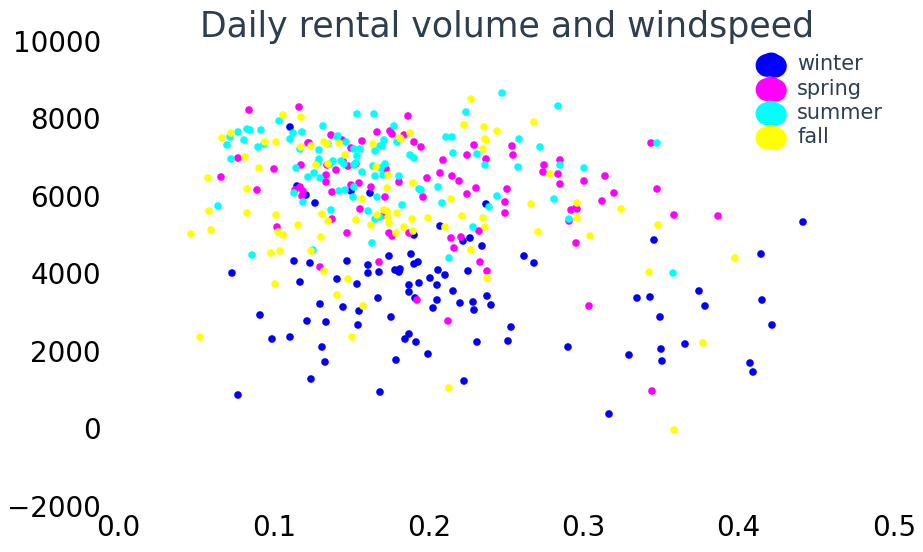

In [22]:
plt.scatter(
    weather[weather['season_desc'] == 'winter']['windspeed'],
    weather[weather['season_desc'] == 'winter']['total_riders'],
    s=30, color='blue', label='winter'
)
plt.scatter(
    weather[weather['season_desc'] == 'spring']['windspeed'],
    weather[weather['season_desc'] == 'spring']['total_riders'],
    s=30, color='magenta', label='spring'
)
plt.scatter(
    weather[weather['season_desc'] == 'summer']['windspeed'],
    weather[weather['season_desc'] == 'summer']['total_riders'],
    s=30, color='cyan', label='summer'
)
plt.scatter(
    weather[weather['season_desc'] == 'fall']['windspeed'],
    weather[weather['season_desc'] == 'fall']['total_riders'],
    s=30, color='yellow', label='fall'
)
plt.title("Daily rental volume and windspeed")
plt.legend(loc=1)
plt.show()

###4.How do the rental volumes vary with geography? Compute the average daily rentals for each station and use this as the radius for a scatterplot of each station's latitude and longitude.

In [ ]:
stations = station [['station', 'lat', 'long']]

In [28]:
count = usage['station_start'].value_counts()

In [138]:
average_rental_df.index = range(185)

In [54]:
average_rental = count / 365　

In [114]:
average_rental_df = DataFrame({ 'average_rental' : count / 365})

In [121]:
average_rental_df.index = range(185)

In [ ]:
merged_df = pd.concat([stations, average_rental_df], axis=1)

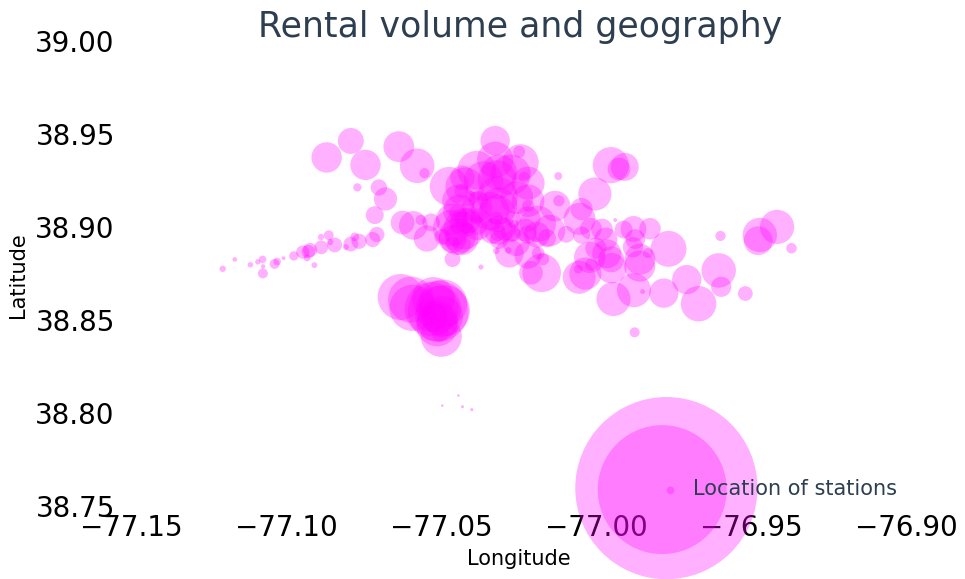

In [160]:
plt.scatter(merged_df['long'], merged_df['lat'], color='magenta', alpha=0.3, s=(merged_df['average_rental']*10), label='Location of stations', )
plt.legend(loc=4)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Rental volume and geography')
plt.show()